# Ford GoBike EDA
## by Alexander Keller

The data was provided through Udacity's course platform and consists of the bikesharing data from February 2019 of the Ford GoBike dataset.
My generally interest was if there is any difference of bikesharing patterns in gender, age, time of the day and whethere or not there are some "hot-spots" where specific advertising prices could be more expensiver than somewhere else. This also could be more flexible for different times of the day (like on TV ...)
Therefore the following questions should be answered:

- When are most trips taken in terms of time of day or day of the week?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?
- Are there a "hot-spots" somewhere?

### Data overview
The original data consists of 183412 datapoints and 16 different features. There were no duplicates but about 5% missing or corrupted data, which were all dropped. The cleaned dataframe consists of 174952 datapoints.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
# about observations
print(f"Dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")
# given the missing data is only about 5%, lets drop the the observations and reset the index
df_clean = df.dropna().reset_index().drop(['index'], axis = 1)

Dataframe has 183412 rows and 16 columns.


In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

### The structure of the dataset

#### There are three categorical features:

- user_type: customer, subscriber
- member_gender: Male, Other, Female
- bike_share_for_all_trip: Yes, No
- start_station_name: name of the station
- end_station_name: name of the station

#### There are 13 numerical faetures

- duration_sec: duration of sharing in seconds
- start_time: timestamp when start
- end_time: timestamp when ended
- start_station_id: float id of the station to the name
- start_station_latitude: float value of the latitute
- start_station_longitude: float value of the longitude
- end_station_id: float id of the station
- end_station_latitude: float of the latitude
- end_station_longitude: float value of the longitude
- bike_id: int value of the bike
- member_birth_year: float value


### Average duration of bike trips

Text(0.5, 1.0, 'Average duration of bikesharing')

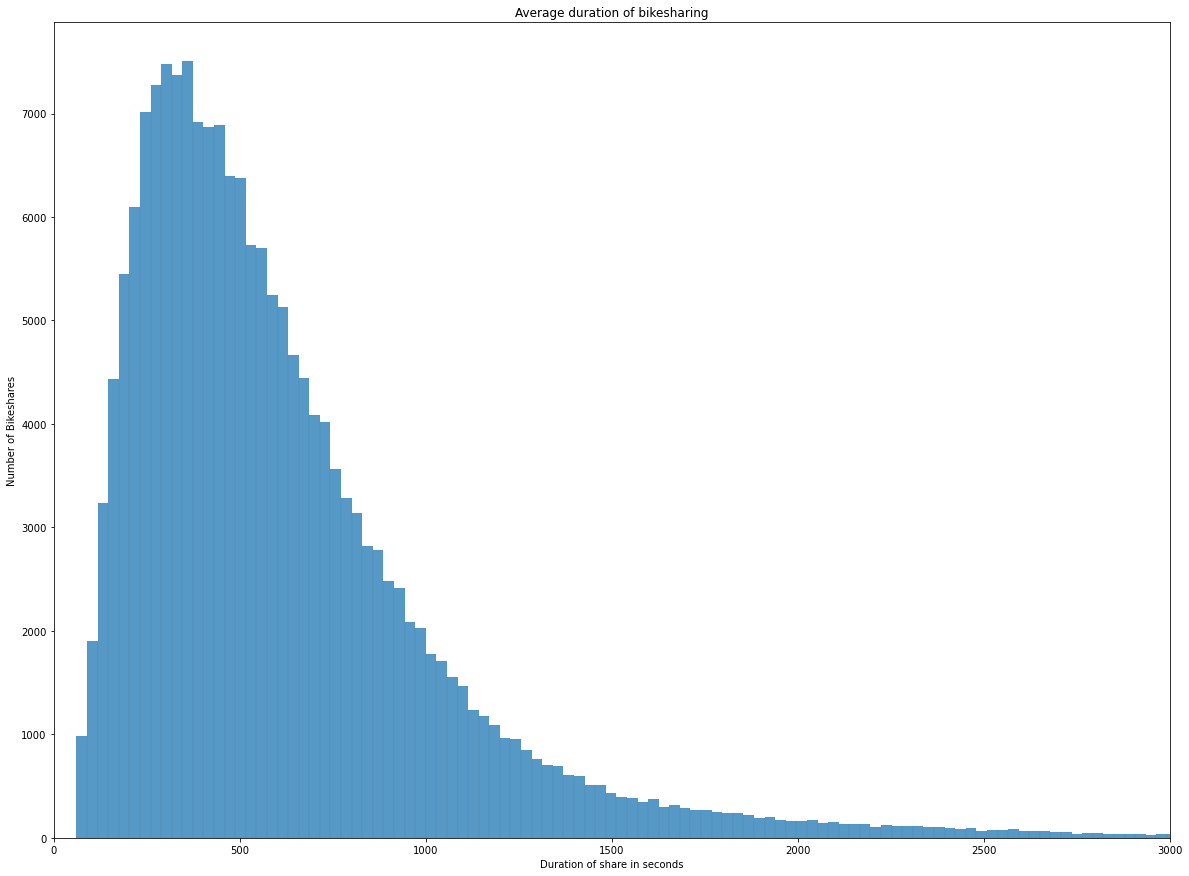

In [4]:
# plot a histogramm with a xlimit of 3000 captures almost 99% of all data
plt.figure(figsize = (20, 15))
plt.ylabel('Number of Bikeshares')
plt.xlabel('Duration of share in seconds')
sns.histplot(df.duration_sec, bins = 3000)
plt.xlim(0,3000)
plt.title('Average duration of bikesharing')

Having a median of about 510 seconds, a mean of 704, gives us an idea that the average bike ride took about 10 minutes...
Which seems indeed a decent distance, taking an average speed of 15 km/h (~4 m/s) leads to approximately 2.5 km distance. That seems a great indicator that some people prefer thinking of the environment by neither using overstacked puplic transport or cars...

### Most common bikeshares during the week and day

Text(0.5, 1.0, 'Bikeshares during the week')

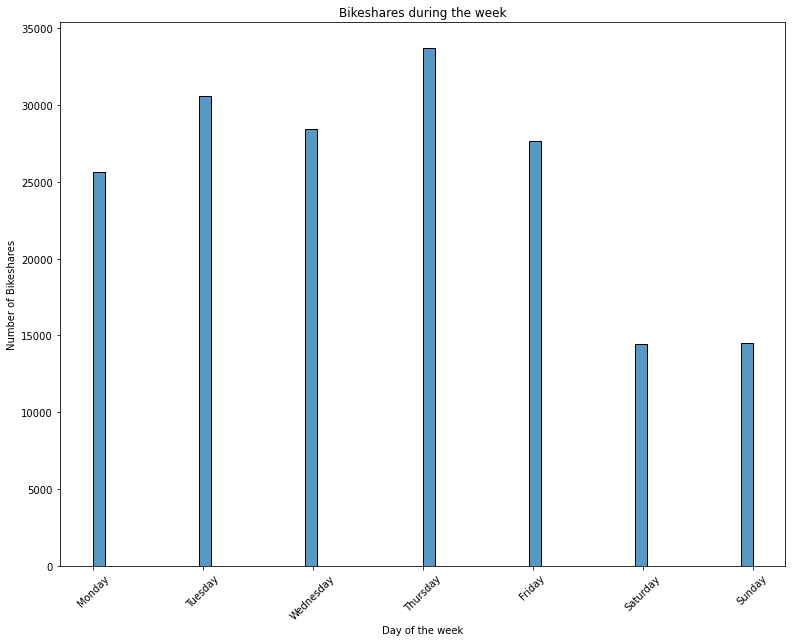

In [5]:
# separate the start timestamp in hour, day, month
from datetime import datetime
df_clean['start_month'] = df_clean.start_time.apply(lambda ts: datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f").month)
df_clean['start_weekday'] = df_clean.start_time.apply(lambda ts: datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f").weekday())
df_clean['start_hour'] = df_clean.start_time.apply(lambda ts: datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f").hour)

plt.figure(figsize=(13,10))
plt.ylabel('Number of Bikeshares')
plt.xlabel('Day of the week')
chart = sns.histplot(df_clean.start_weekday)
chart.set_xticks(range(7))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday' ,'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.title('Bikeshares during the week')

The plot shows, that during the week there are significant more people using the bikesharing than on the weekend. So, it's a good indicator that a lot of people using the service to commute to work.

<AxesSubplot:title={'center':'Bike shares throughout the day'}, xlabel='Time of the day', ylabel='Number of Bikeshares'>

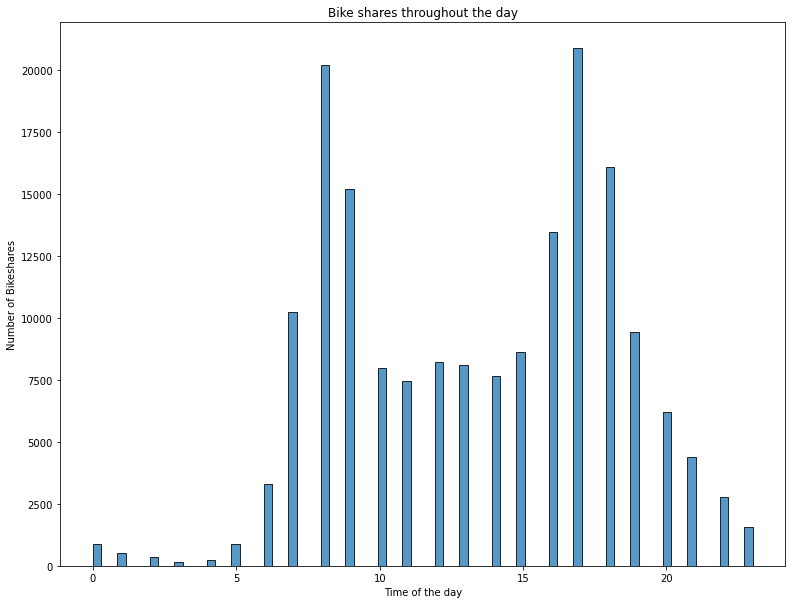

In [6]:
plt.figure(figsize=(13,10))
plt.title('Bike shares throughout the day')
plt.ylabel('Number of Bikeshares')
plt.xlabel('Time of the day')
sns.histplot(df_clean.start_hour)

It can be clearly seen, that there are two peaks during the day (8am and 5pm, 9am and 6pm). That can mean, that most of the people using the bike service to commute to their workplace. Moreover during the weekend, there are significant less people using the bike sharing service.

### Bikerides based on age

(18.0, 80.0)

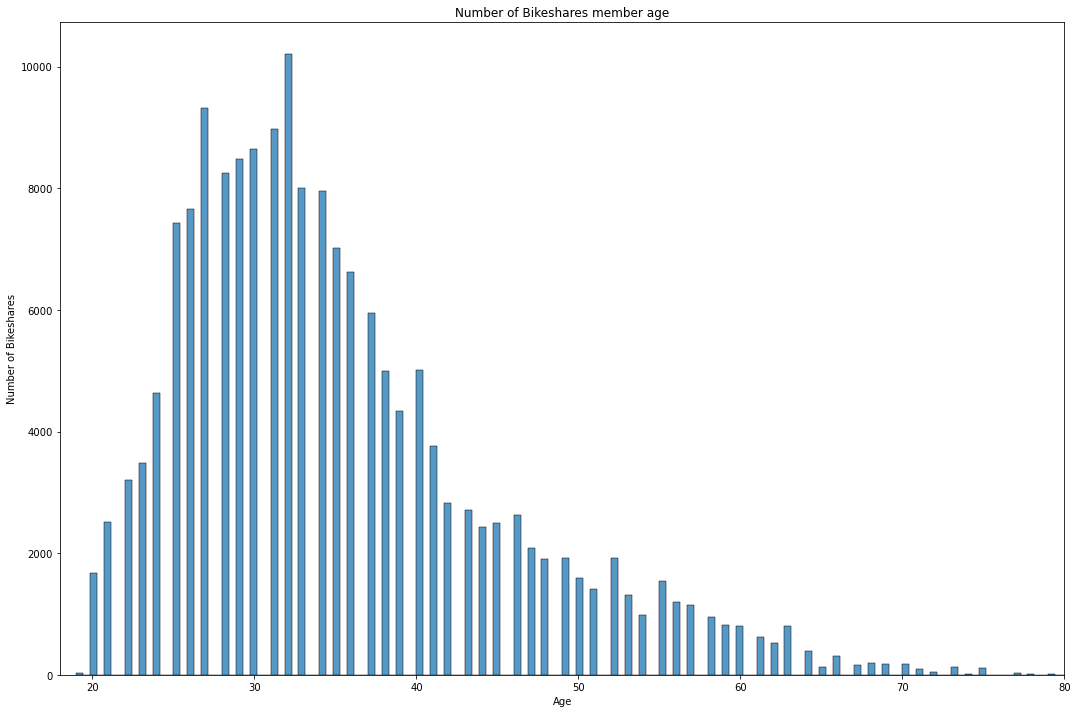

In [7]:
# correct the data
# looks like a typo, replace with a correction
current_year = 2020
df_clean['member_birth_year'] = df_clean.member_birth_year.apply(lambda x: 1978 if x == 1878 else x)
# replace every one older than 100 with the average birth year
birth_mean = df_clean['member_birth_year'].mean()
df_clean['member_birth_year'] = df_clean.member_birth_year.apply(lambda x: birth_mean if x < 1920 else x)

# calculate age and plot the data
plt.figure(figsize = (18,12))
plt.title('Number of Bikeshares member age')
plt.ylabel('Number of Bikeshares')
plt.xlabel('Age')
df_clean['member_age'] = current_year - df_clean.member_birth_year.astype(int)
sns.histplot(df_clean.member_age)
plt.xlim(18,80)

The average people who is using the service is about 35 years old. Outliers due to not entering the birthyear where imputed by the mean age. One person seemed to enter the hundreds wrong, were the birth year was manually adjusted.

### Do some genders use share bikes longer?

Text(0.5, 1.0, 'Average duration of different genders')

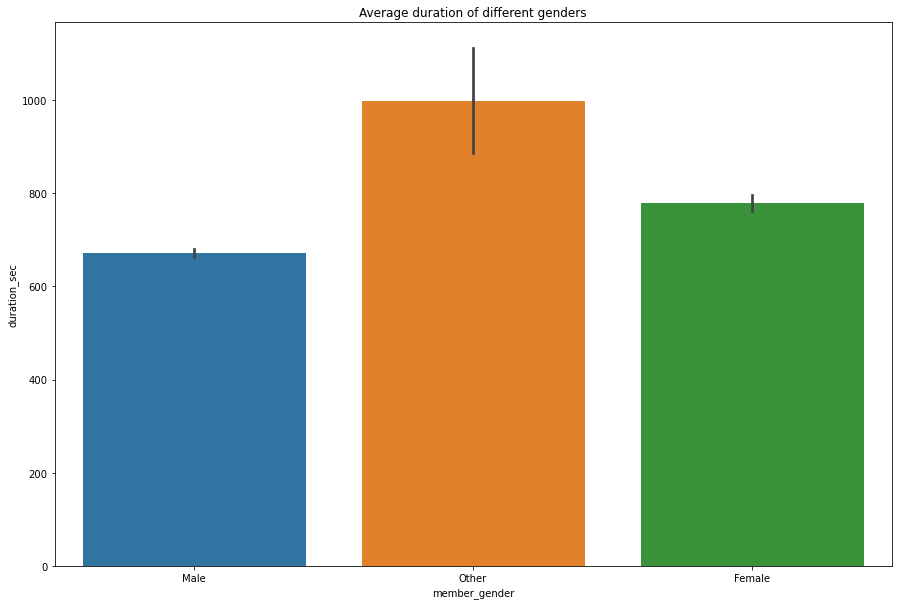

In [8]:
plt.figure(figsize = (15,10))
plt.title('Duration of sharing by genders')
plt.ylabel('Duration in seconds')
plt.xlabel('Gender')
sns.barplot(x = 'member_gender', y = 'duration_sec', data = df_clean)
plt.title('Average duration of different genders')

On average, the gender group Other uses the bikesharing longer than the Male and Femal group.

### Do customers use share bikes longer?

<AxesSubplot:title={'center':'Average duration of Customers vs. Subscribers'}, xlabel='user_type', ylabel='duration_sec'>

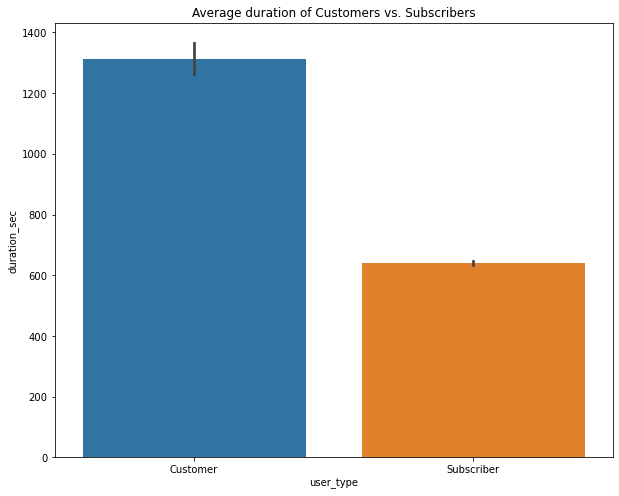

In [9]:
plt.figure(figsize = (10,8))
plt.title('Average duration of Customers vs. Subscribers')
plt.xlabel('Duration of sharing')
plt.ylabel('Usertype')
sns.barplot(x = 'user_type', y = 'duration_sec', data = df_clean)

The Customers are using the bike sharing service about two times longer than subscribers.

### What about hot-spots?

<AxesSubplot:title={'center':'Number of Bikeshares Start station id'}, xlabel='Station ID', ylabel='Number of Bikeshares'>

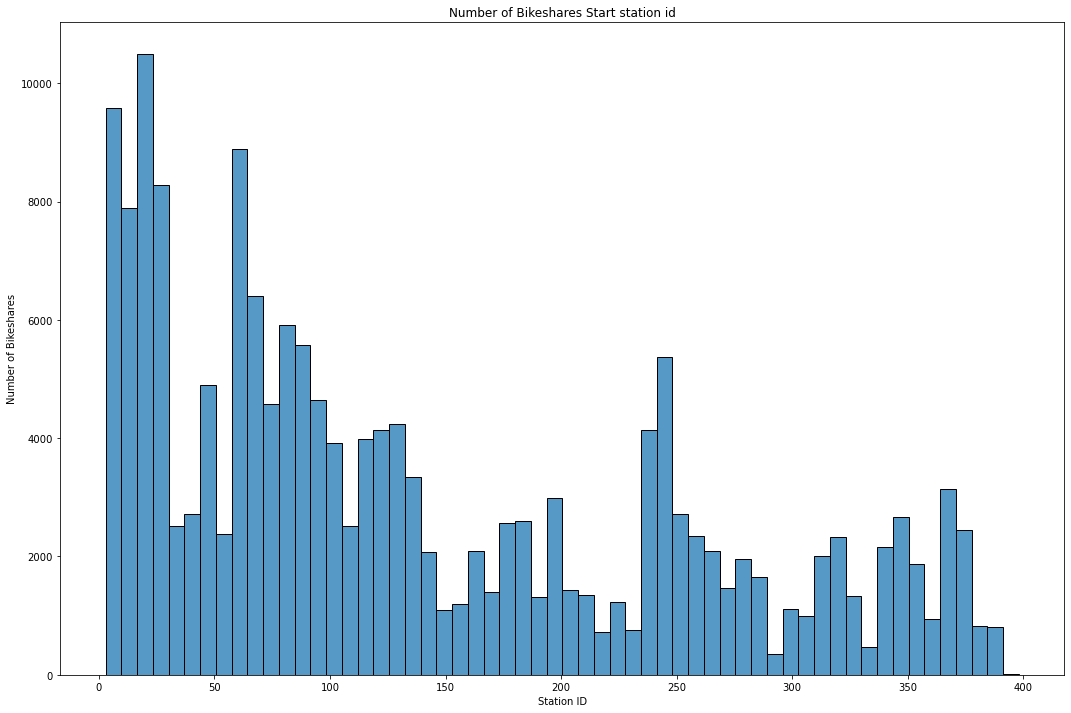

In [10]:
# visual inspection
plt.figure(figsize = (18,12))
plt.title('Number of Bikeshares Start station id')
plt.ylabel('Number of Bikeshares')
plt.xlabel('Station ID')
sns.histplot(df_clean.start_station_id)

There are clearly some stations that are more regularly used than others.
The top 10 stations are:

In [11]:
top10 = df_clean.start_station_id.value_counts().sort_values(ascending=False).head(10)
top10_index = df_clean.start_station_id.value_counts().sort_values(ascending=False).head(10).index
top10_names = []
# get the names to the IDs
for i in top10_index:
    top10_names.append(df_clean[df_clean.start_station_id.values == i].iloc[0]['start_station_name'])

In [12]:
for rides, name in zip(top10.values, top10_names):
    print(f"{name} with about {rides} on average.")

Market St at 10th St with about 3649 on average.
San Francisco Caltrain Station 2  (Townsend St at 4th St) with about 3408 on average.
Berry St at 4th St with about 2952 on average.
Montgomery St BART Station (Market St at 2nd St) with about 2711 on average.
Powell St BART Station (Market St at 4th St) with about 2620 on average.
San Francisco Caltrain (Townsend St at 4th St) with about 2577 on average.
San Francisco Ferry Building (Harry Bridges Plaza) with about 2541 on average.
Howard St at Beale St with about 2216 on average.
Steuart St at Market St with about 2191 on average.
Powell St BART Station (Market St at 5th St) with about 2144 on average.


That results in that 10 stations out of 329 stations (about 3 %) make about 16 % of all bikeshares.

### What about the bikesharing pattern throughout the day at the Top5 stations?

<Figure size 1440x1080 with 0 Axes>

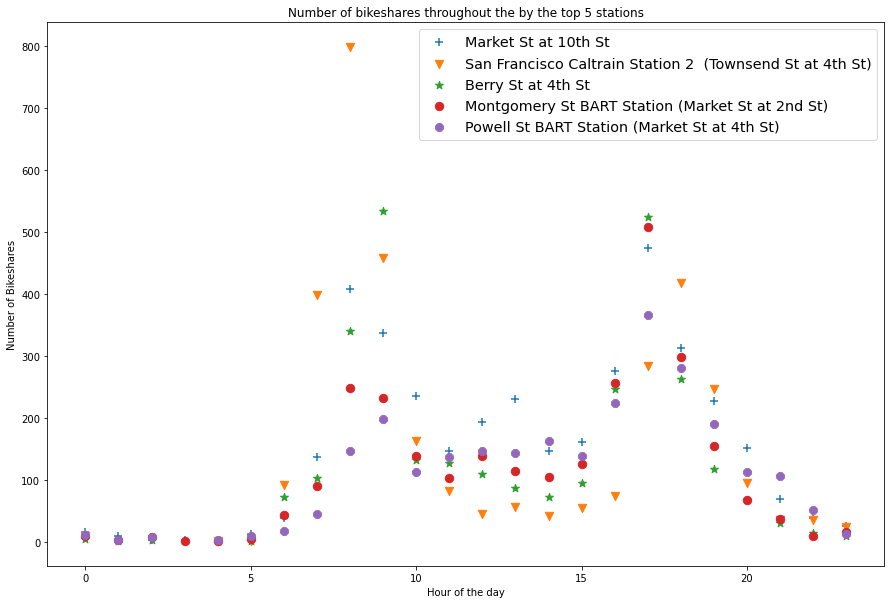

In [13]:
plt.figure(figsize=(20,15))
plt.figure(figsize = (15, 10))
plt.title('Number of bikeshares throughout the by the top 5 stations')
plt.ylabel('Number of Bikeshares')
plt.xlabel('Hour of the day')
markers = ['+', 'v', '*', 'o', '8']
for j, i in zip(range(5),top10_index[:5]):
    temp_df = df_clean[df_clean.start_station_id == i]
    plt.scatter(x = temp_df['start_hour'].value_counts().sort_index().index, y = temp_df['start_hour'].value_counts().sort_index().values, s = 70, marker = markers[j], label = top10_names[j])
plt.legend(fontsize = 'x-large')

The pattern that during mornings beginning of work and afternoon finishing work seems to go through all the stations, especially the top5. Interestingly the most used stations are near metrostations, so that bikesharing is second part of commute and not the sole commute way...

In [ ]:
!jupyter nbconvert explanation.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook explanation.ipynb to slides
[NbConvertApp] Writing 516395 bytes to explanation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/explanation.slides.html
Use Control-C to stop this server
